#**Flagging Loans**

##**Assignment**

Using the available dataset, build a model that will predict the value of the target variable bad_flag. Prepare a presentation, as a Jupyter notebook, where you will train and test different models, argue for the choice for the best model and show the expected default rate at different approval levels.


###**Data Description**

The provided CSV file (test_task.csv) contains data on repeated loans from current clients.



###**Practicalities**

You will need to provide a Jupyter Notebook that describes your approach as a result of this task.

Your solution will need to include your thought process, including data exploration, model training, evaluation, and selection procedures, results, and interpretation. The assignment explicitly mentions model selection as an important part, so make sure that is reflected in your solution.

It is important that your code is well-structured, and all output (numerical and visual) are properly documented and easily readable. Always keep in mind that the final document would be read by someone with a business background, so be sure to clearly explain any technical terms and metrics.


####**To download the dataset** <a href="https://drive.google.com/drive/folders/1QiQNeUUyVXJDEhVtaYvrcsBIw3fC9gGy?usp=sharing"> Click here </a>

In [1]:
import pandas as pd
data = pd.read_csv('test_task.csv')
print(data.columns)

Index(['loanKey', 'rep_loan_date', 'first_loan', 'dpd_5_cnt', 'dpd_15_cnt',
       'dpd_30_cnt', 'first_overdue_date', 'close_loans_cnt',
       'federal_district_nm', 'TraderKey', 'payment_type_0', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'gender', 'bad_flag'],
      dtype='object')


In [2]:
print("Data Types and Missing Values:\n")
print(data.info())  # Data types and missing values

print("\nBasic Statistics:\n")
print(data.describe(include='all'))  # Basic statistics including categorical

print("\nTarget Variable Distribution (bad_flag):\n")
print(data['bad_flag'].value_counts(normalize=True) * 100)  # Distribution of bad_flag

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  paymen

In [3]:
data['rep_loan_date'] = pd.to_datetime(data['rep_loan_date'], errors='coerce')
data['first_overdue_date'] = pd.to_datetime(data['first_overdue_date'], errors='coerce')

missing_data = data.isnull().mean() * 100
print("Missing Data Percentage:\n", missing_data)

data['dpd_5_cnt'].fillna(data['dpd_5_cnt'].median(), inplace=True)
data['dpd_15_cnt'].fillna(data['dpd_15_cnt'].median(), inplace=True)
data['dpd_30_cnt'].fillna(data['dpd_30_cnt'].median(), inplace=True)
data['close_loans_cnt'].fillna(data['close_loans_cnt'].median(), inplace=True)
data['past_billings_cnt'].fillna(data['past_billings_cnt'].median(), inplace=True)
data['score_1'].fillna(data['score_1'].median(), inplace=True)

data.drop(columns=['score_2'], inplace=True)

data['federal_district_nm'].fillna(data['federal_district_nm'].mode()[0], inplace=True)

print("\nRemaining Missing Data After Imputation:\n", data.isnull().sum())

Missing Data Percentage:
 loanKey                 0.000000
rep_loan_date           0.000000
first_loan              0.000000
dpd_5_cnt              83.762329
dpd_15_cnt             83.762329
dpd_30_cnt             83.762329
first_overdue_date     83.762329
close_loans_cnt         0.360837
federal_district_nm     0.264614
TraderKey               0.000000
payment_type_0          0.000000
payment_type_1          0.000000
payment_type_2          0.000000
payment_type_3          0.000000
payment_type_4          0.000000
payment_type_5          0.000000
past_billings_cnt       5.965841
score_1                15.636276
score_2                94.250662
age                     0.000000
gender                  0.000000
bad_flag                0.000000
dtype: float64

Remaining Missing Data After Imputation:
 loanKey                   0
rep_loan_date             0
first_loan                0
dpd_5_cnt                 0
dpd_15_cnt                0
dpd_30_cnt                0
first_overdue_date    


Data after Encoding and Scaling:

   loanKey rep_loan_date first_loan  dpd_5_cnt  dpd_15_cnt  dpd_30_cnt  \
0   708382    2016-10-06 2015-11-13  -0.181344    0.133978   -0.200195   
1   406305    2016-03-26 2015-09-28  -0.181344   -2.960177   -0.200195   
2   779736    2016-10-30 2015-12-21  -0.181344    0.133978   -0.200195   
3   556376    2016-06-29 2015-06-30  -0.181344    0.133978   -0.200195   
4   266968    2015-12-01 2015-08-03  -0.181344    0.133978   -0.200195   

   close_loans_cnt  TraderKey  payment_type_0  payment_type_1  ...       age  \
0         1.055534          6               0               0  ... -1.251862   
1        -0.688216          6               0               0  ... -1.344174   
2         0.474284          6               0               0  ... -1.436486   
3        -0.106966         14               0               0  ... -1.251862   
4        -0.688216         22               0               3  ... -0.144119   

   gender  bad_flag  federal_district_n

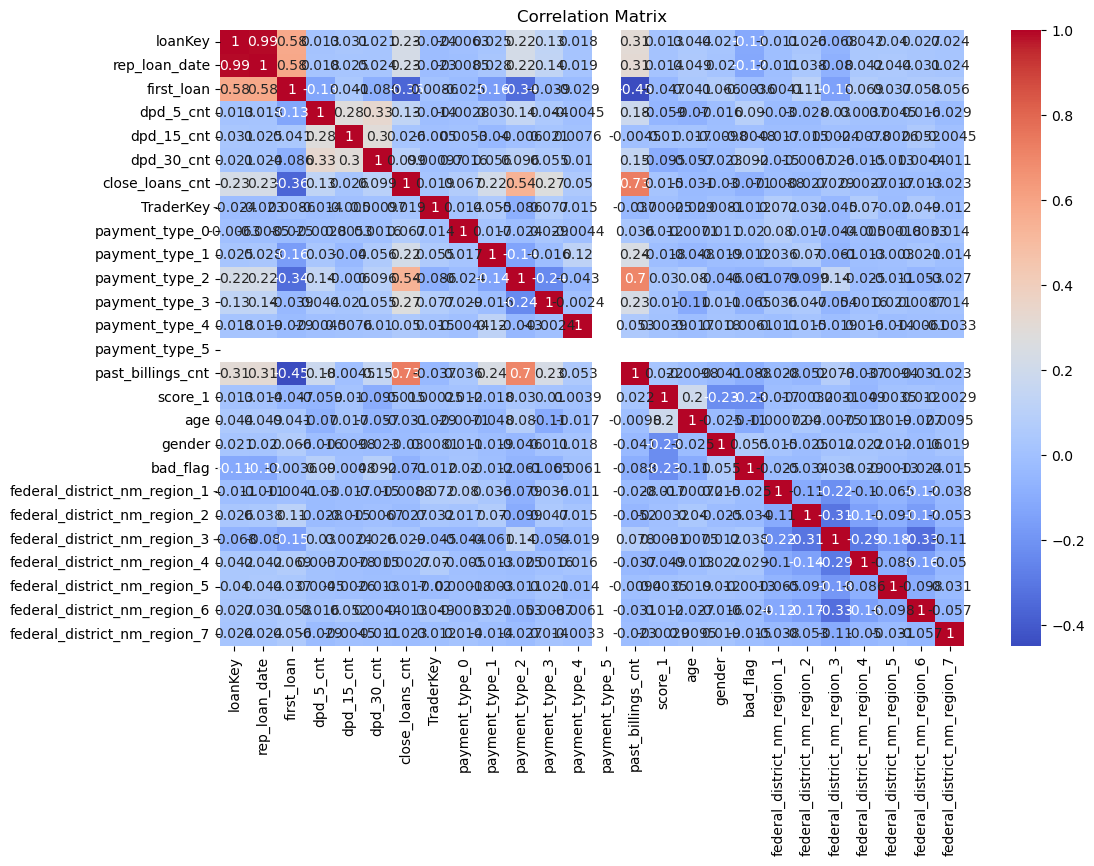

In [4]:
data.drop(columns=['first_overdue_date'], inplace=True)

data['first_loan'] = pd.to_datetime(data['first_loan'], errors='coerce')

data = pd.get_dummies(data, columns=['federal_district_nm'], drop_first=True)

from sklearn.preprocessing import StandardScaler

numerical_cols = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt', 'past_billings_cnt', 'score_1', 'age']

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nData after Encoding and Scaling:\n")
print(data.head())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


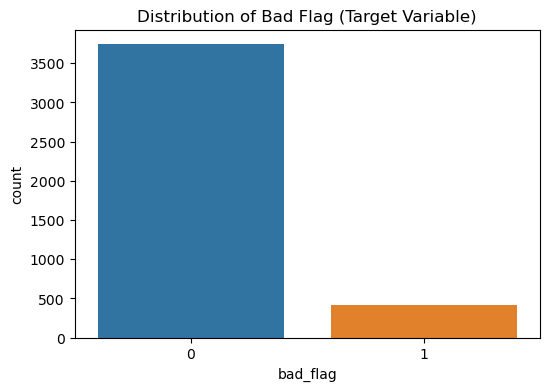

C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

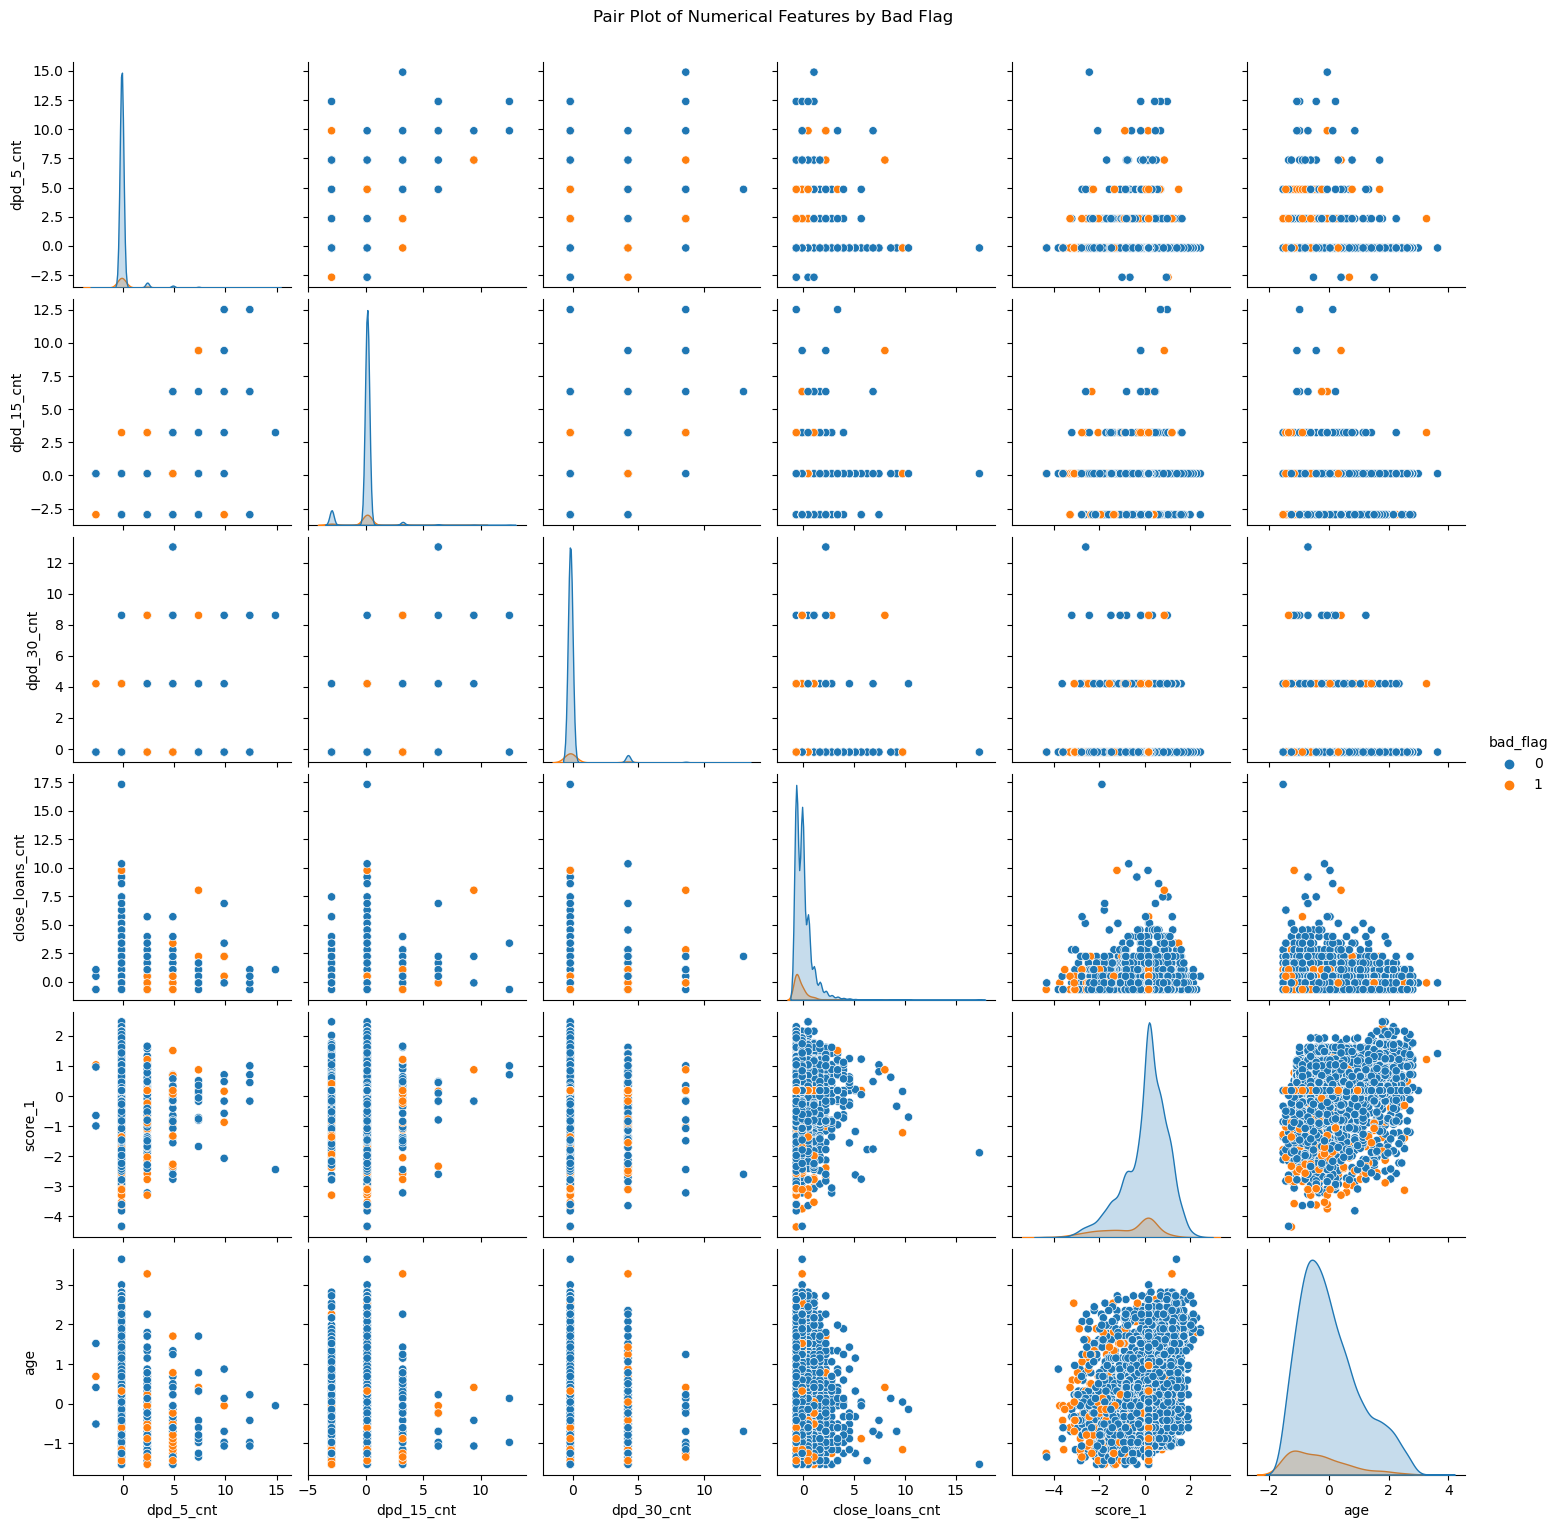

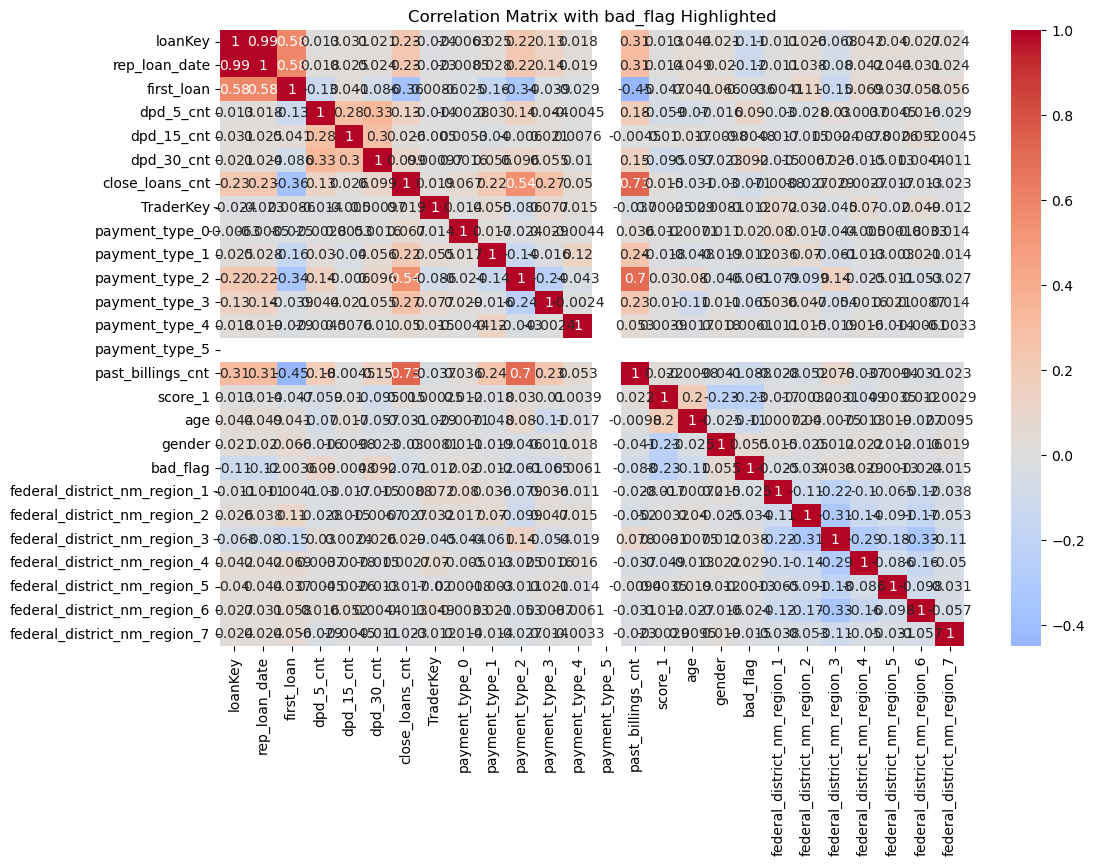

Training set size: 3325
Test set size: 832


In [5]:
# Step 5: Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Exploring the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='bad_flag', data=data)
plt.title('Distribution of Bad Flag (Target Variable)')
plt.show()

# Visualizing relationships between numerical features and the target variable
plt.figure(figsize=(14, 8))
sns.pairplot(data, hue='bad_flag', vars=['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt', 'score_1', 'age'])
plt.suptitle('Pair Plot of Numerical Features by Bad Flag', y=1.02)
plt.show()

# Correlation Matrix with bad_flag highlighted
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with bad_flag Highlighted')
plt.show()

# Step 6: Prepare Data for Modeling

from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = data.drop(columns=['bad_flag', 'loanKey', 'rep_loan_date', 'first_loan'])  # Dropping ID and date-related columns
y = data['bad_flag']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


In [6]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assume `X` is your feature set and `y` is your target variable 'bad_flag'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_resampled.value_counts()}")


Original dataset shape: bad_flag
0    2991
1     334
Name: count, dtype: int64
Resampled dataset shape: bad_flag
1    2991
0    2991
Name: count, dtype: int64


In [8]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
[[718  31]
 [ 69  14]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       749
           1       0.31      0.17      0.22        83

    accuracy                           0.88       832
   macro avg       0.61      0.56      0.58       832
weighted avg       0.85      0.88      0.86       832

